# ASSIGNMENT 4


## Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].






[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


In [9]:
#code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Part 1: Nonparametric Estimation

# Kernel Density Estimation (Parzen)
GAUSSIAN_SCALE_FACTOR = 1 / np.sqrt(2 * np.pi)  

def gaussian_kernel(x, mean, bandwidth):
    return GAUSSIAN_SCALE_FACTOR * np.exp(-0.5 * ((x - mean) / bandwidth)**2)


In [11]:
def parzen_density_estimation(train_data, test_data, bandwidth):
    
    if bandwidth <= 0:
        raise ValueError('Bandwidth must be a positive number.')
        
    n_train = len(train_data)
    n_test = len(test_data)
    density_estimates = np.zeros(n_test)

    for i in range(n_test):
        kernel_values = gaussian_kernel(test_data[i], train_data, bandwidth)
        density = np.sum(kernel_values)
        density_estimates[i] = density / (n_train * bandwidth)

    return density_estimates

In [12]:
# k-nearest neighbor density estimation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [13]:
def knn_density_estimation(train_data, test_data, k):
    n_train = len(train_data)
    n_test = len(test_data)
    density_estimates = np.zeros(n_test)
    for i in range(n_test):
        distances = np.zeros(n_train)
        for j in range(n_train):
            distances[j] = euclidean_distance(test_data[i], train_data[j])

        # Get k nearest neighbors indices
        sorted_indices = np.argsort(distances)[:k]
    
        # Calculate distance to k-th neighbor
        k_nearest_distance = distances[sorted_indices[-1]]
    
        # Density estimate is k/n_train divided by volume of k-nearest sphere
        density_estimates[i] = k / (n_train * (4/3)*np.pi*(k_nearest_distance**3))

    return density_estimates
# Load train and test datasets

In [14]:
class_1_train_file = r"C:\Users\salih\Desktop\hm4\part1\transposed_Class1.csv"
class_2_train_file = r"C:\Users\salih\Desktop\hm4\part1\transposed_Class2.csv" 
test_data_file = r"C:\Users\salih\Desktop\hm4\part1\transposed_Test.csv"

class_1_train = pd.read_csv(class_1_train_file)
class_2_train = pd.read_csv(class_2_train_file)

test_data = pd.read_csv(test_data_file)

class_1_train = class_1_train.values
class_2_train = class_2_train.values
test_data = test_data.values

In [15]:

# Density estimation using Parzen (Kernel Density Estimation)
bandwidth = 0.5  # Choose an appropriate bandwidth value

class_1_density_estimates = parzen_density_estimation(class_1_train, test_data, bandwidth)
class_2_density_estimates = parzen_density_estimation(class_2_train, test_data, bandwidth)


In [16]:

# Compute class prior
n_class_1_train = len(class_1_train)
n_class_2_train = len(class_2_train)
total_train_samples = n_class_1_train + n_class_2_train

class_1_prior = n_class_1_train / total_train_samples
class_2_prior = n_class_2_train / total_train_samples

In [17]:

# Compute posterior probability and perform classification
posterior_class_1 = class_1_density_estimates * class_1_prior
posterior_class_2 = class_2_density_estimates * class_2_prior

classification_labels = np.argmax(np.vstack((posterior_class_1, posterior_class_2)), axis=0)


In [18]:

# Save classification results to CSV file
results = np.column_stack((test_data[:, :-1], classification_labels))

np.savetxt('classification_resultsPart1.csv', results, delimiter=',', header='x1,x2,Label', comments='')


## Part 2 

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data [4]. Maximum Likelihood Estimation requires that the data are sampled from a multivariate normal distribution [5]. 

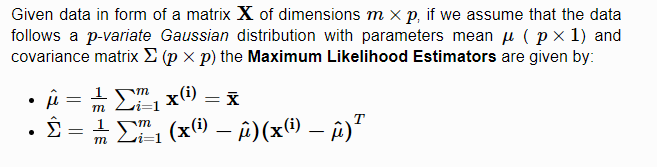

This part consists of 3 steps explained below.

Note: Don't forget to add comments in your codes.

[4]: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

[5]: https://online.stat.psu.edu/stat505/lesson/12/12.7

**Step 1 :** You are provided two CSV files that contains samples derived from two bivariate Gaussian distributions separately; Class1.csv corresponds to $w_{1}$ class distribution, Class2.csv to $w_{2}$.  Estimate the parameters of these distributions using the max-likelihood estimates (given above) on the given data samples for both classes. 

Write your codes in the cells shared below.

In [19]:
#code here

# Part 2: Maximum Likelihood Estimation

class_1_data_file = r"C:\Users\salih\Desktop\hm4\part2\transposed_Class1.csv"
class_2_data_file = r"C:\Users\salih\Desktop\hm4\part2\transposed_Class2.csv" 
# Load data samples from CSV files
class_1_data = np.loadtxt(class_1_data_file, delimiter=',')
class_2_data = np.loadtxt(class_2_data_file, delimiter=',')

In [20]:

# Estimate parameters using maximum likelihood estimation
class_1_mean = np.mean(class_1_data, axis=0)
class_1_covariance = np.cov(class_1_data.T)

class_2_mean = np.mean(class_2_data, axis=0)
class_2_covariance = np.cov(class_2_data.T)


**Step 2 :** Write a program to find the decision boundaries between the two distributions for $w_{1}$ and $w_{2}$; and plot them. 

Please explain briefly, why the decision boundary is in the form that you obtained? 

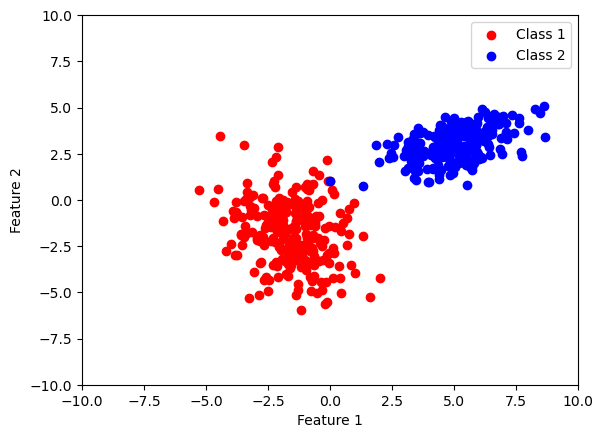

In [21]:

# Plot decision boundaries
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z_1 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(class_1_covariance)))) * np.exp(-0.5 * ((X - class_1_mean[0])**2 / class_1_covariance[0, 0] + (Y - class_1_mean[1])**2 / class_1_covariance[1, 1]))
Z_2 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(class_2_covariance)))) * np.exp(-0.5 * ((X - class_2_mean[0])**2 / class_2_covariance[0, 0] + (Y - class_2_mean[1])**2 / class_2_covariance[1, 1]))

plt.contour(X, Y, Z_1, levels=[0.2, 0.5, 0.8], colors='r')
plt.contour(X, Y, Z_2, levels=[0.2, 0.5, 0.8], colors='b')

plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='r', label='Class 1')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], c='b', label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()#code here

(your explanation here)

**Step 3 :** You are provided a set of test samples in another CSV file. For each sample in that file, assign the given test samples to the appropriate classes according to the Bayesian Minimum Error-Rate principle. 

Provide the classification results in tabular form; each row contains the data in the form: ($x_{i_1}$, $x_{i_2}$, $w_{i}$), where $x_{i_1}$ and $x_{i_2}$ represents the value of the first and the second features, respectively; $w_{i}$ represents the assigned class index, i.e. 1 or 2. 

Plot your classification result. Make sure that all samples are depicted in one plot embedded on the computed 
densities with a distinguished color.

Use following prior probabilities: 

Case 1: P($w_{1}$) = P($w_{2}$) = 0.5

Case 2: P($w_{1}$) = 0.8, P($w_{2}$) = 0.2

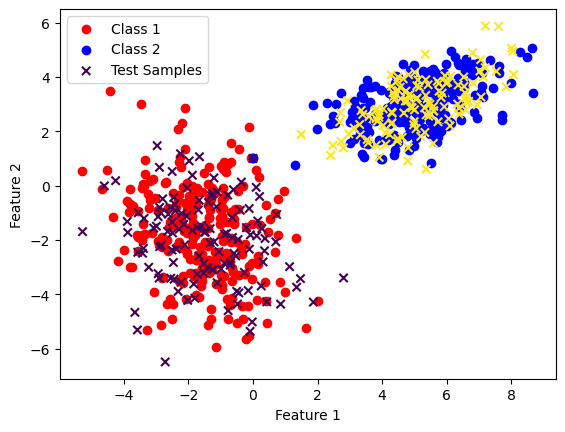

In [22]:

# Assign test samples to appropriate classes using Bayesian Minimum Error-Rate principle
test_samples = np.loadtxt(r"C:\Users\salih\Desktop\hm4\part2\transposed_Test.csv", delimiter=',')

class_1_posterior = (1 / (2 * np.pi * np.sqrt(np.linalg.det(class_1_covariance)))) * np.exp(-0.5 * ((test_samples[:, 0] - class_1_mean[0])**2 / class_1_covariance[0, 0] + (test_samples[:, 1] - class_1_mean[1])**2 / class_1_covariance[1, 1])) * 0.8
class_2_posterior = (1 / (2 * np.pi * np.sqrt(np.linalg.det(class_2_covariance)))) * np.exp(-0.5 * ((test_samples[:, 0] - class_2_mean[0])**2 / class_2_covariance[0, 0] + (test_samples[:, 1] - class_2_mean[1])**2 / class_2_covariance[1, 1])) * 0.2

classification_results = np.argmax(np.column_stack((class_1_posterior, class_2_posterior)), axis=1)

true_labels = test_samples[:, -1]  # Assuming the true labels are in the last column

true_labels = np.round(true_labels).astype(int)  # Convert continuous labels to integers
classification_results = np.round(classification_results).astype(int)  # Convert continuous predictions to integers
results = np.column_stack((test_samples, classification_results))
np.savetxt('classification_resultsPart2.csv', results, delimiter=',', header='x1,x2,Class', comments='')


# Plot classification results
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='r', label='Class 1')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], c='b', label='Class 2')
plt.scatter(test_samples[:, 0], test_samples[:, 1], c=classification_results, cmap='viridis', marker='x', label='Test Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()#code here

#### Note1: Don't forget add comments in your codes.
#### Note2: You should implement each part yourself without libraries such as scipy, scikit-learn, statsmodel. You can use functions from libraries like numpy, pandas etc. 